## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
mouse_merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
mousemerge_df=mouse_merge_df.rename(columns={'Tumor Volume (mm3)':'Tumor_Volume_mm3'})


In [5]:
# Checking the number of mice.
mousemerge_df['Mouse ID'].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=mousemerge_df[mouse_merge_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmousedata=mousemerge_df.loc[mouse_merge_df["Mouse ID"]!='g989']
cleanmousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen
cleanmousedata.Tumor_Volume_mm3.describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor_Volume_mm3, dtype: float64

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grp_regimen=cleanmousedata.groupby('Drug Regimen').Tumor_Volume_mm3

# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({
    "Mean":grp_regimen.mean(),
    'Median':grp_regimen.median(),
    'variance':grp_regimen.var(),
    'Standard Deviation':grp_regimen.std(),
    'SEM':grp_regimen.sem()
})
summary_df

,Mean,Median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#creating groupy by variable to create summary stats
grp_tumorvolume=cleanmousedata.groupby('Drug Regimen').Tumor_Volume_mm3
grp_tumorvolume

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grp_regimen.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
cleanmousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
#data that will be used in charts
regimnegrp_timepoint=cleanmousedata.groupby('Drug Regimen').Timepoint
#count of time points per regimen
counttimepoints=regimnegrp_timepoint.count()
#x-axis
regimens=['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']



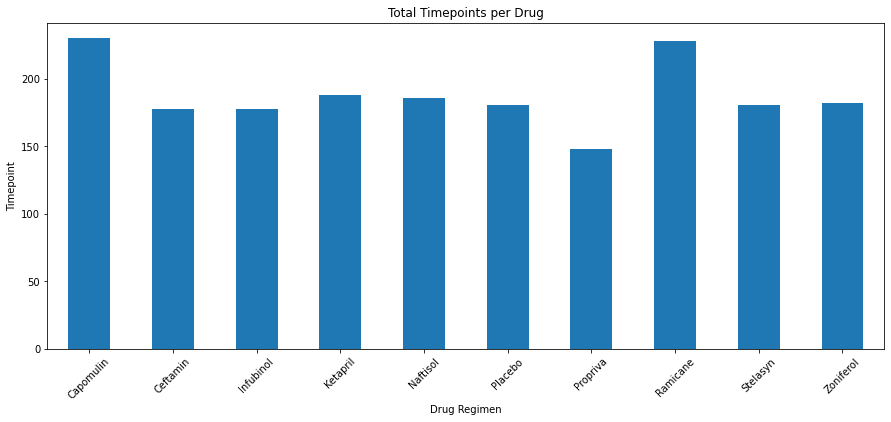

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
cleanmousedata.groupby('Drug Regimen').Timepoint.count().plot.bar(figsize=(15,6),rot=45,
        title='Total Timepoints per Drug',ylabel='Timepoint')
plt.show()

Text(0.5, 0, 'Drug Regimen')

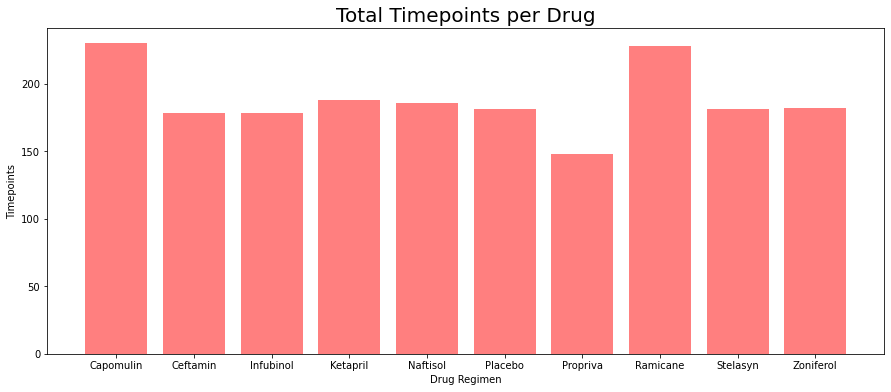

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=[15,6])
plt.bar(regimens,counttimepoints, color='r', alpha=0.5, align="center")
plt.title('Total Timepoints per Drug',fontsize=20)
plt.ylabel('Timepoints')
plt.xlabel('Drug Regimen')

<AxesSubplot:title={'center':'Distribution of Female vs Male'}, ylabel='Sex'>

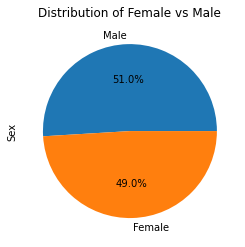

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleanmousedata.Sex.value_counts().plot.pie(title='Distribution of Female vs Male', autopct='%1.1f%%')


Text(0.5, 1.0, 'Distribution of Female vs Male')

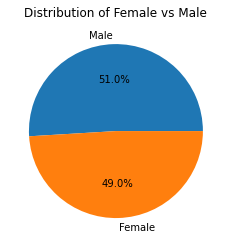

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexdata=cleanmousedata.Sex.value_counts()
plt.pie(sexdata,labels=['Male','Female'],autopct='%1.1f%%')
plt.title('Distribution of Female vs Male')

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time = cleanmousedata.groupby('Mouse ID').max()[['Timepoint']].reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor = max_time.merge(cleanmousedata,on=['Mouse ID','Timepoint'])

# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = final_tumor.loc[final_tumor['Drug Regimen']==drug,'Tumor_Volume_mm3']
    
    #this calculating each quartile to find outliers
    iqr = tumor_data.quantile(.75) - tumor_data.quantile(.25)
    low = tumor_data.quantile(.25) - (1.5*iqr)
    upper = tumor_data.quantile(.75) + (1.5*iqr)
    
    # add subset 
    tumor_list.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    print(f'{drug} poetential outliers: {tumor_data[(tumor_data<low)|(tumor_data>upper)]}')

Capomulin poetential outliers: Series([], Name: Tumor_Volume_mm3, dtype: float64)
Ramicane poetential outliers: Series([], Name: Tumor_Volume_mm3, dtype: float64)
Infubinol poetential outliers: 31    36.321346
Name: Tumor_Volume_mm3, dtype: float64
Ceftamin poetential outliers: Series([], Name: Tumor_Volume_mm3, dtype: float64)


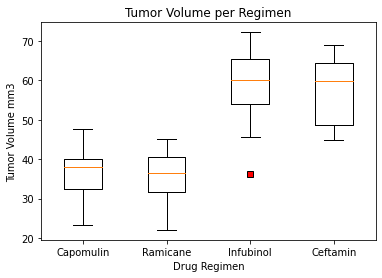

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#matplotlib boxplot 
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(tumor_list,flierprops=red_square)
plt.title('Tumor Volume per Regimen')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume mm3')
plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s710_df=cleanmousedata.loc[cleanmousedata['Mouse ID']=='s710',['Tumor_Volume_mm3','Timepoint',]]
s710_df

,Tumor_Volume_mm3,Timepoint
361,45.000000,0
362,43.180977,5
363,43.688026,10
364,41.845235,15
365,42.629963,20
366,43.060409,25
367,43.571703,30
368,44.160519,35
369,40.171920,40
370,40.728578,45


<AxesSubplot:title={'center':'Mouse s710 Tumor Volume vs Time Point'}, xlabel='Time point', ylabel='Volume mm3'>

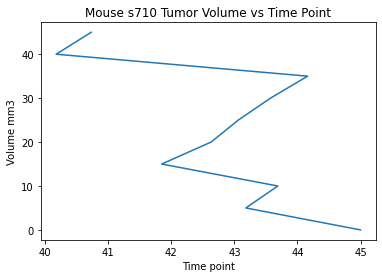

In [28]:
#Pandas graph
s710_df.plot.line(x='Tumor_Volume_mm3',y='Timepoint',
                  title='Mouse s710 Tumor Volume vs Time Point',ylabel='Volume mm3', xlabel='Time point', legend=False)


In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin=cleanmousedata.loc[cleanmousedata['Drug Regimen']=='Capomulin',['Tumor_Volume_mm3','Weight (g)']]
grp_weight=Capomulin.groupby('Weight (g)').Tumor_Volume_mm3.mean()
grpweight_df=grp_weight.reset_index()

<AxesSubplot:title={'center':'Capomulin-average tumor volume vs. mouse weight '}, xlabel='Weight (g)', ylabel='Avg Tumor Vol mm3'>

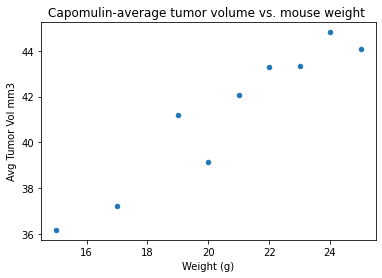

In [23]:
#panadas scatter plot
grpweight_df.plot.scatter('Weight (g)','Tumor_Volume_mm3',
                          title='Capomulin-average tumor volume vs. mouse weight ', ylabel="Avg Tumor Vol mm3")

Text(0, 0.5, 'Avg Tumor Vol mm3')

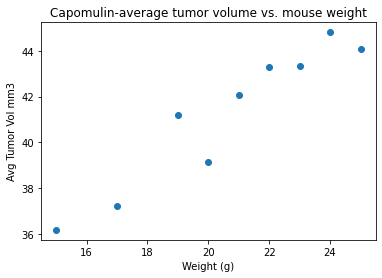

In [24]:
#matplotlib scatter plot
plt.scatter(grpweight_df['Weight (g)'],grpweight_df['Tumor_Volume_mm3'])
plt.title('Capomulin-average tumor volume vs. mouse weight')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol mm3')

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
#for the Capomulin regimen
#regersion
x_values=grpweight_df['Weight (g)']
y_values=grpweight_df['Tumor_Volume_mm3']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


The Correlation Coefficients is: 0.9505243961855268


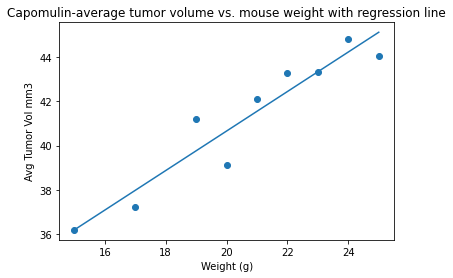

In [27]:
#plotting information matplotlib
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.title('Capomulin-average tumor volume vs. mouse weight with regression line')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol mm3')
print(f"The Correlation Coefficient is: {rvalue}")

3 observations about Data
1. The correclation coefficient is .95 of the Capomulin regimen which indicates that there is a strong possitive correlation between weight and tumor volume. 

2. By looking at the graph Mouse s710 Tumor Volume vs Time Point we can see that for rat s710 that the longer the treamnet went on the smaller the size of the tumor got. This may indicate that the regimen reduced the size of the tumor. 

3.By looking at the box plot we can see that for Infubinol the tumor volumn on average was for the final time point was higher than the other drug regimens. this may indicate that Infubinol my not have been as effective at reducing the tumor volume compared to the other 3 regimens in the box plot. 